In [20]:
import matplotlib.pyplot as plt
import numpy as np
import hydroeval as he
import seaborn as sns
import pandas as pd



In [21]:
Test_p = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_prediction2.npy")
Test_r = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_raw2.npy")
Test_t = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_target2.npy")
Time = np.load("/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Test_date2.npy")
Test_p.shape, Test_t.shape, Test_r.shape, Time.shape

((827, 20, 186), (827, 20, 186), (827, 20, 186), (827, 186))

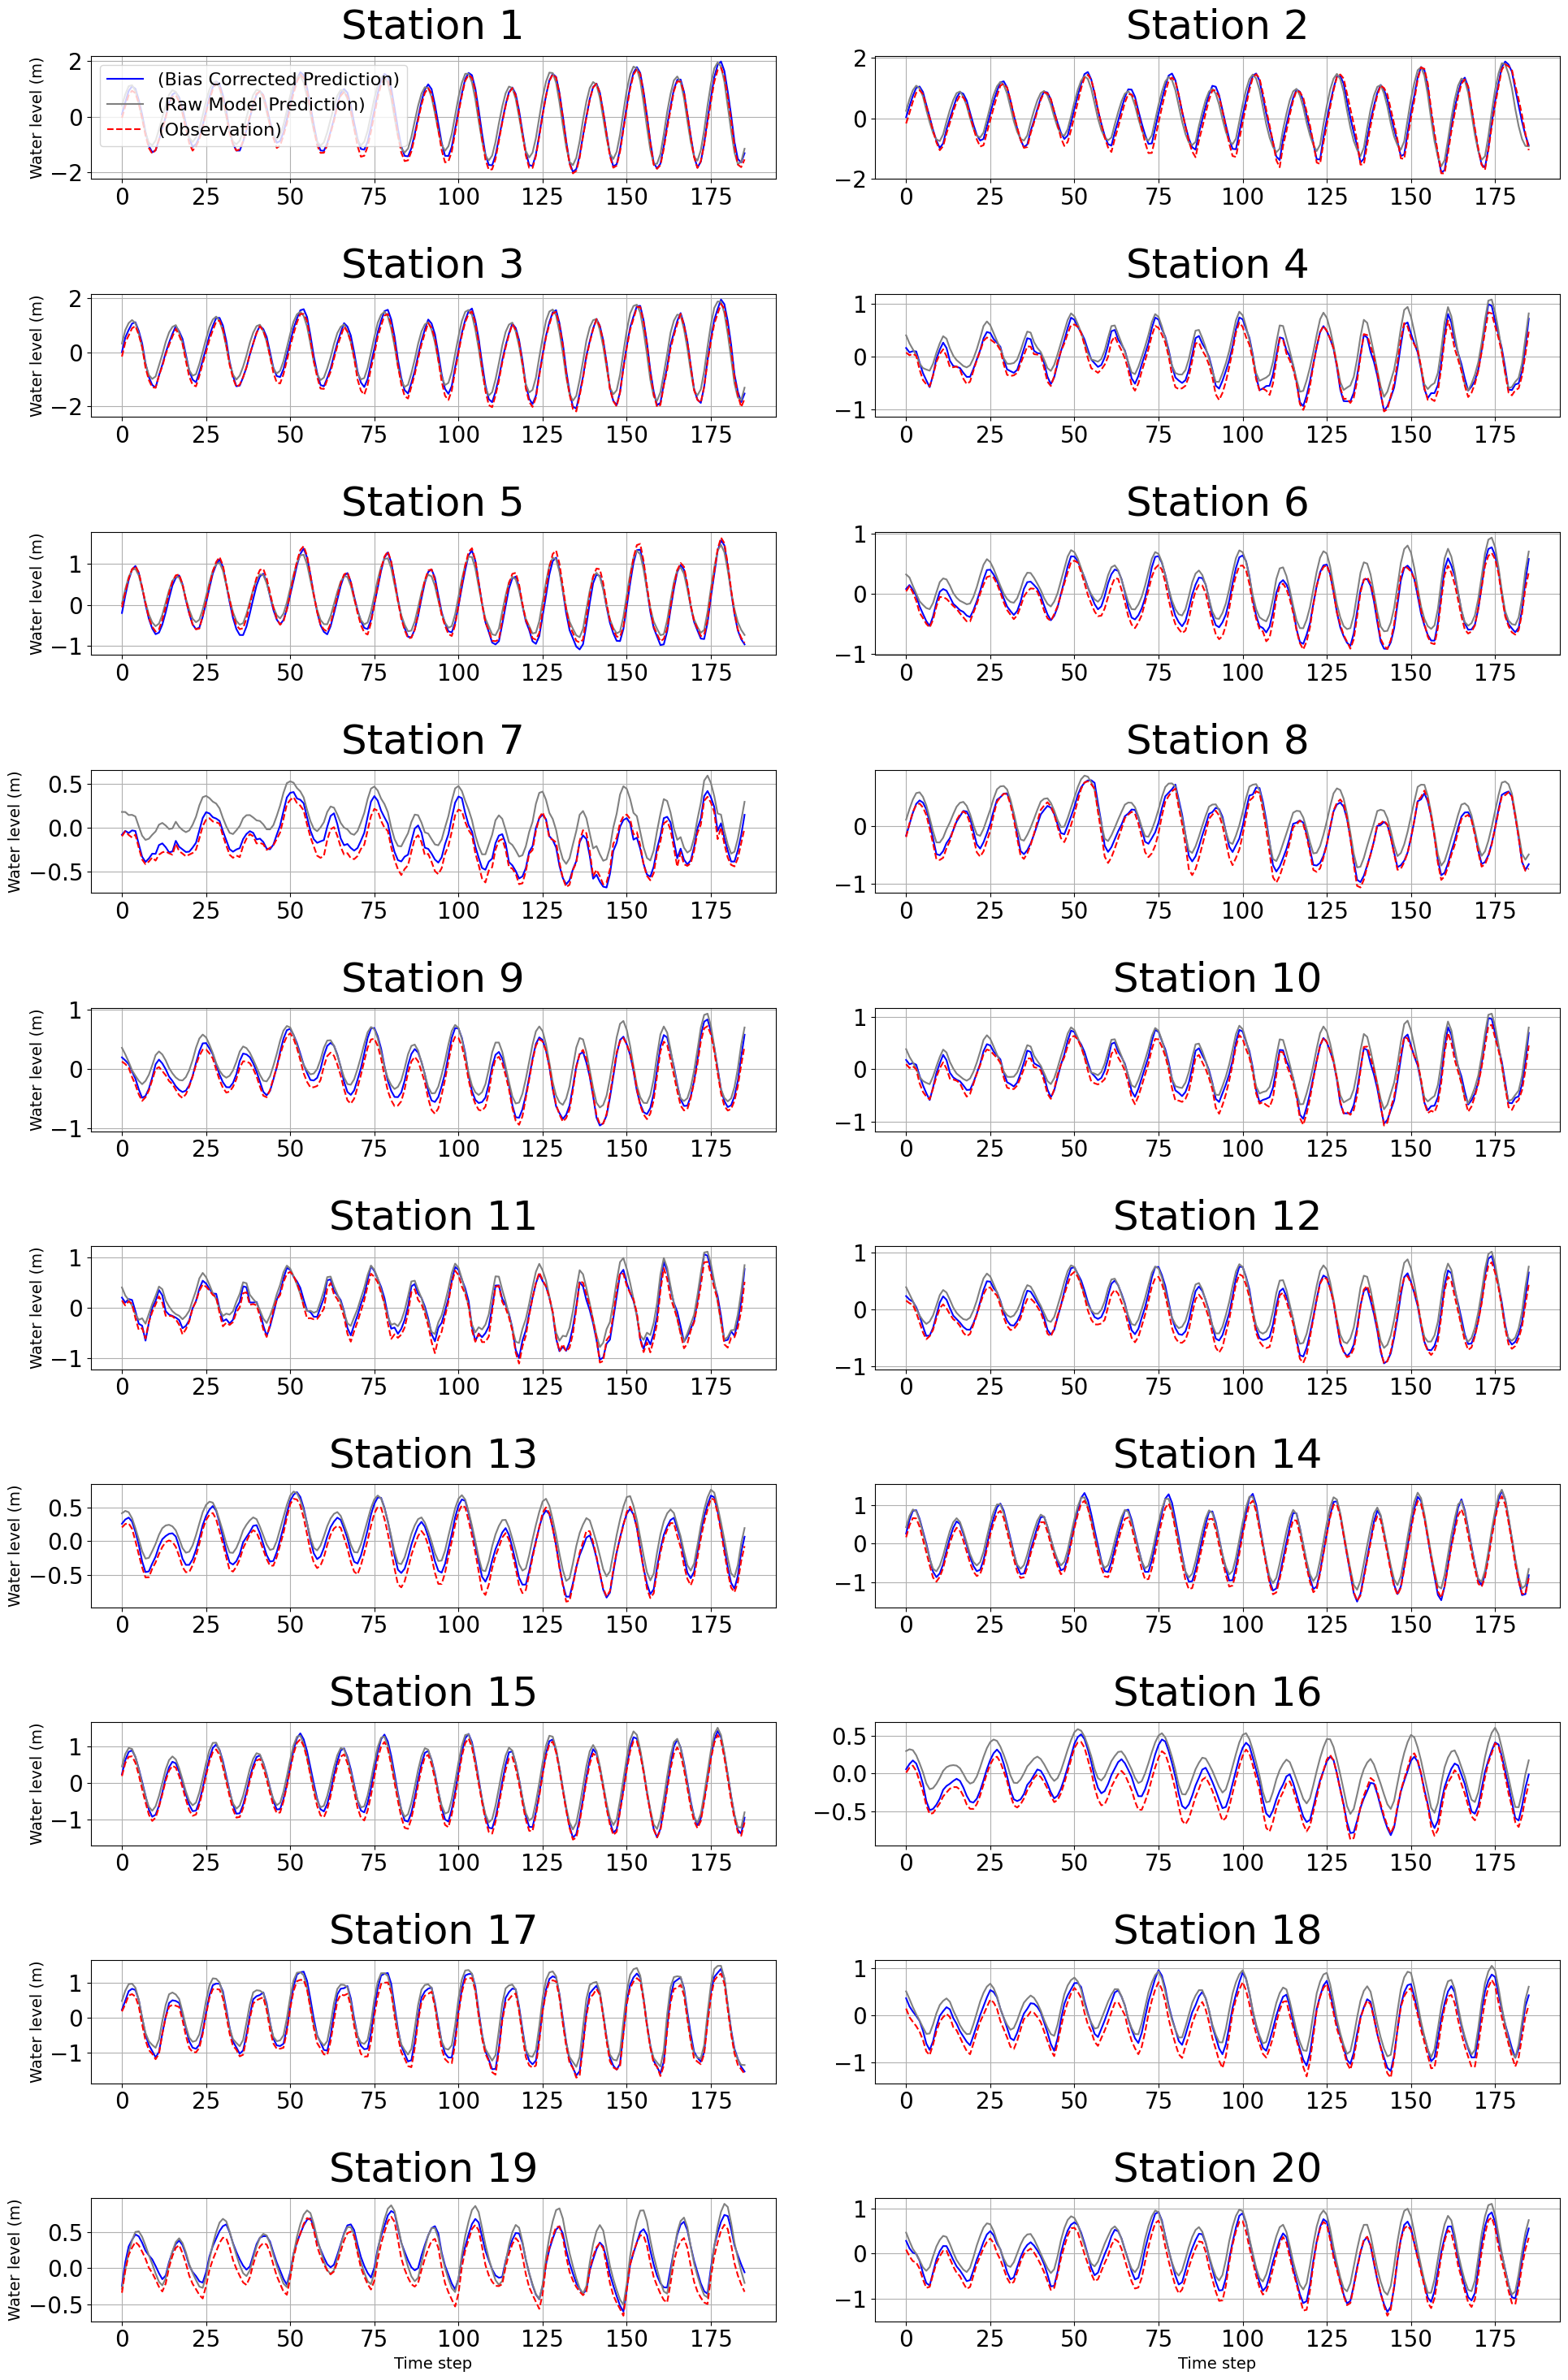

In [25]:

# Assuming `water_level_prediction_test`, `y_test0`, `x_test0` are predefined as per your data
# This will work with your 10x2 grid of subplots

# Set number of rows and columns
nrows = 10
ncols = 2

# Create subplots with 10 rows and 2 columns
fig1, axs1 = plt.subplots(nrows, ncols, figsize=(20, 30))  # Adjust the figsize to accommodate all plots

# Assuming cycle is the specific time point you're working with
cycle = 70

# Flatten the 2D array of axes (axs1 is now a 2D array, we flatten it for easier iteration)
axs1 = axs1.flatten()

for station in range(20):
    axs1[station].plot(Test_p[cycle][station][:], label='(Bias Corrected Prediction)', color='blue')
    axs1[station].plot(Test_r[cycle][station][:], label='(Raw Model Prediction)', color='gray')
    axs1[station].plot(Test_t[cycle][station][:], 
                       label='(Observation)', linestyle='--', color='red')
    

    # Set the title for each subplot
    axs1[station].set_title(f'Station {station + 1}')

# Add a legend to the first plot (this is common to all subplots)
axs1[0].legend(loc='upper left', fontsize=16)

# Add x-axis label ("Time step") to the last row (stations 11 to 20)
for station in [18, 19]:  # Last row corresponds to station 10-19
    axs1[station].set_xlabel('Time step', fontsize=14)
    
# Add y-axis label ("Water level (m)") to the plots on the left (stations 1, 3, 5, ..., 19)
for station in range(0, 20, 2):  # First column corresponds to stations 0, 2, 4, ..., 18
    axs1[station].set_ylabel('Water level (m)', fontsize=14)
    
# Adjust layout to prevent overlapping
fig1.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plots3.png', dpi=300)

# Show the plot
plt.show()


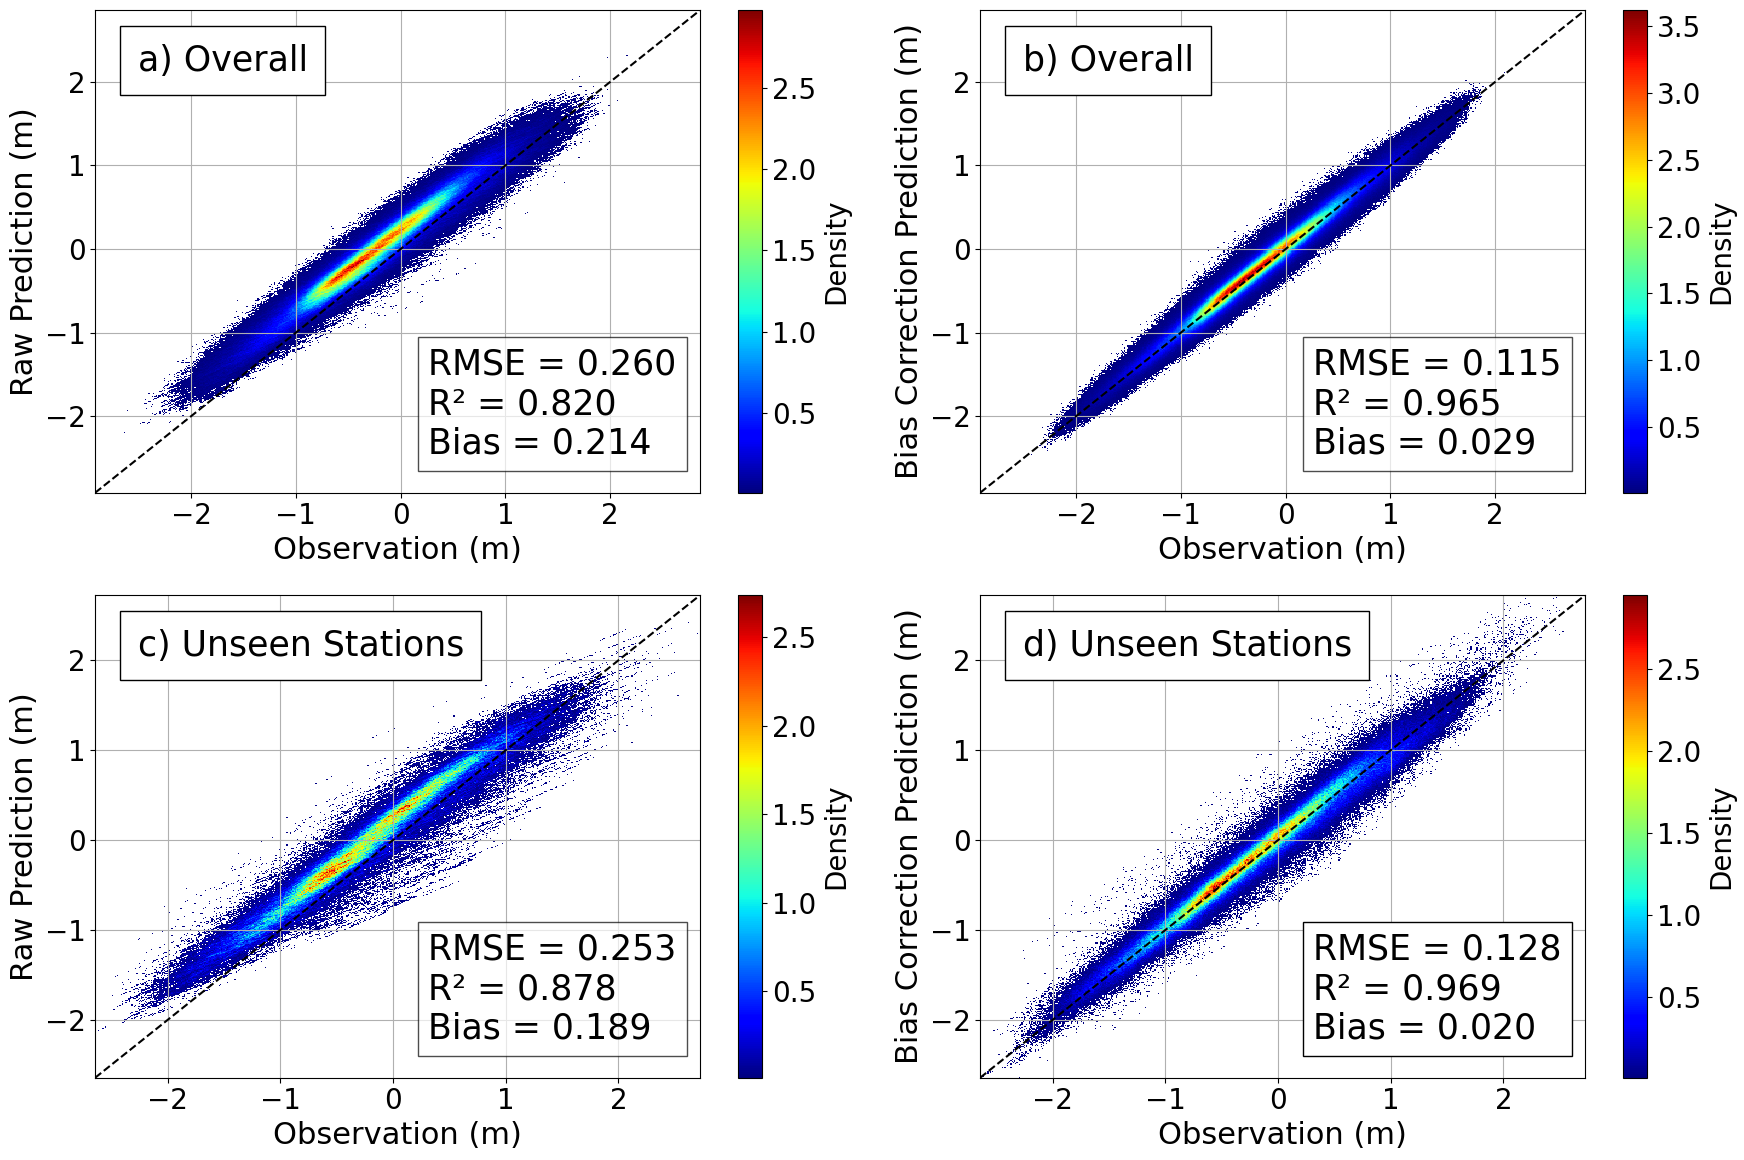

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
from sklearn.metrics import r2_score

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0, 0], label='Density')

# Set the x and y limits to match the range of a
axes[0, 0].set_xlim(a.min(), a.max())
axes[0, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[0, 0].text(0.55, 0.3, stats_text, transform=axes[0, 0].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 0].text(0.07, 0.93, "a) Overall", transform=axes[0, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0, 0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[0, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[0, 1], label='Density')

# Set the x and y limits to match the range of a
axes[0, 1].set_xlim(a.min(), a.max())
axes[0, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[0, 1].text(0.55, 0.3, stats_text, transform=axes[0, 1].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 1].text(0.07, 0.93, "b) Overall", transform=axes[0, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[0, 1].set_xlabel('Observation (m)', fontsize=22)

# Third subplot (on the bottom-left) - Similar to first subplot but for a different subset of data
# (you can adjust this to your needs, for example, different stations or data)
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_r[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[1, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[1, 0], label='Density')

# Set the x and y limits to match the range of a
axes[1, 0].set_xlim(a.min(), a.max())
axes[1, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[1, 0].text(0.55, 0.3, stats_text, transform=axes[1, 0].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 0].text(0.07, 0.93, "c) Unseen Stations", transform=axes[1, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[1, 0].set_xlabel('Observation (m)', fontsize=22)

# Fourth subplot (on the bottom-right) - Similar to second subplot
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_p[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1, 1], label='Density')

# Set the x and y limits to match the range of a
axes[1, 1].set_xlim(a.min(), a.max())
axes[1, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nBias = {bias:.3f}"
axes[1, 1].text(0.55, 0.3, stats_text, transform=axes[1, 1].transAxes, fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 1].text(0.07, 0.93, "d) Unseen Stations", transform=axes[1, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[1, 1].set_xlabel('Observation (m)', fontsize=22)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('figure4.png', dpi=1200)

# Show the plot
plt.show()


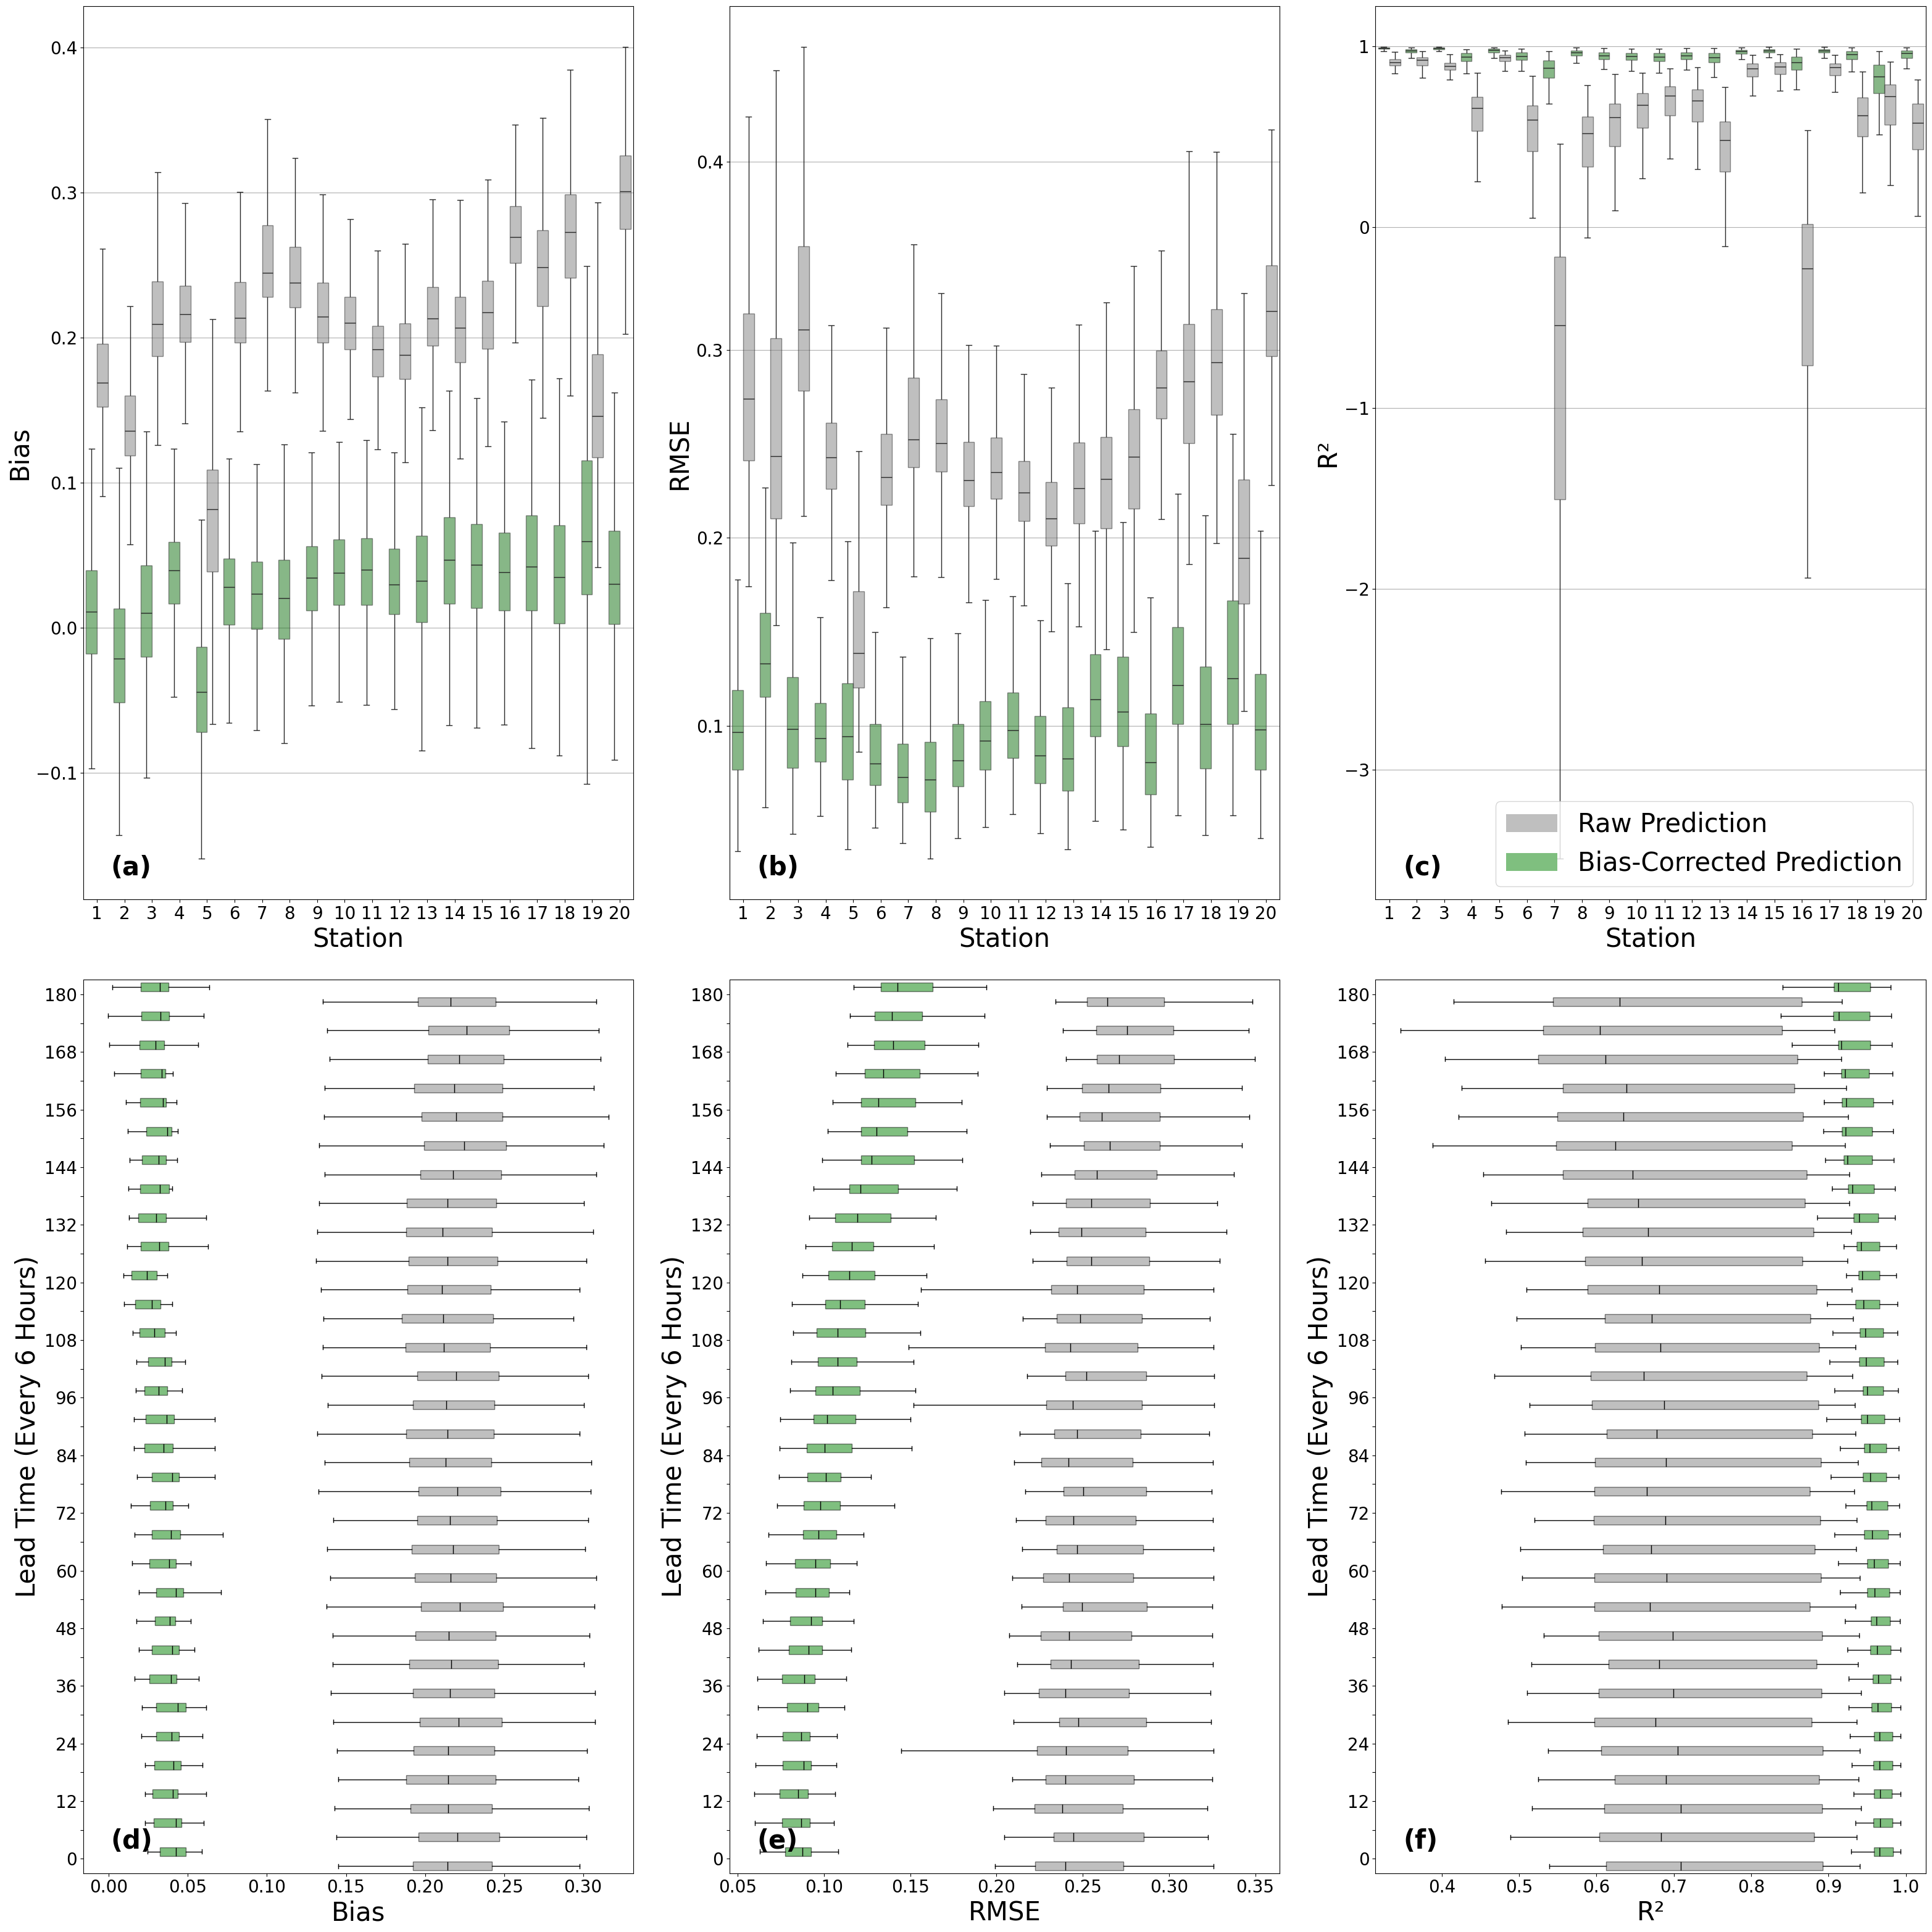

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Ensure font settings
plt.rcParams.update({
    'font.size': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 30,
})

# Metrics
labels = ['a', 'b', 'c', 'd', 'e', 'f']
metrics = {
    'Bias': (bias_corrected_bias, raw_bias),
    'RMSE': (bias_corrected_rmse, raw_rmse),
    'R²': (bias_corrected_r2, raw_r2)
}

# Time indices
time_indices = range(0, 186, 6)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def r2_manual(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2, axis=(0, 2))
    ss_tot = np.sum((true_values - np.mean(true_values, axis=(0, 2), keepdims=True)) ** 2, axis=(0, 2))
    return 1 - ss_res / ss_tot

# Create a combined 2-row, 3-column figure
fig, axes = plt.subplots(2, 3, figsize=(32, 32))
axes = axes.flatten()

# --- Top Row: Station-wise boxplots ---
for i, (metric_name, (bias_corrected, raw)) in enumerate(metrics.items()):
    df_list = []
    for station in range(20):
        df = pd.DataFrame(np.column_stack((bias_corrected[:, station], raw[:, station])),
                          columns=['Bias Corrected Prediction', 'Raw Prediction'])
        df['Station'] = station + 1
        df_list.append(df)

    cdf = pd.concat(df_list)
    mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name=metric_name)

    sns.boxplot(x="Station", y=metric_name, hue="Prediction Type", data=mdf,
                palette={'Bias Corrected Prediction': 'green', 'Raw Prediction': 'gray'},
                showfliers=False, boxprops=dict(alpha=0.5), ax=axes[i])
    
    axes[i].set_xlabel('Station')
    axes[i].set_ylabel(metric_name)
    axes[i].tick_params(axis='both')
    axes[i].text(0.05, 0.05, f'({labels[i]})', transform=axes[i].transAxes,
                 fontsize=30, fontweight='bold', va='top', ha='left')
    axes[i].get_legend().remove()

# --- Bottom Row: Lead-time-wise boxplots ---
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
r2_raw_samples = [r2_manual(Test_t[:, :, i:i+6], Test_r[:, :, i:i+6]) for i in time_indices]
r2_corrected_samples = [r2_manual(Test_t[:, :, i:i+6], Test_p[:, :, i:i+6]) for i in time_indices]

leadtime_data = [
    (bias_raw_samples, bias_corrected_samples, 'Bias'),
    (rmse_raw_samples, rmse_corrected_samples, 'RMSE'),
    (r2_raw_samples, r2_corrected_samples, 'R²')
]

for j, (raw_samp, corrected_samp, ylabel) in enumerate(leadtime_data, start=3):
    axes[j].boxplot(raw_samp, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].boxplot(corrected_samp, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
    axes[j].set_yticklabels([f'{i}' for i in time_indices])
    axes[j].set_ylabel('Lead Time (Every 6 Hours)')
    axes[j].set_xlabel(ylabel)
    axes[j].text(0.05, 0.05, f'({labels[j]})', transform=axes[j].transAxes,
                 fontsize=30, fontweight='bold', va='top', ha='left')
    axes[j].grid()
    labels_y = axes[j].get_yticklabels()
    for k, label in enumerate(labels_y):
        if k % 2 != 0:
            label.set_visible(False)

# Add legend to bottom-right plot
axes[2].legend(handles=[
    Patch(facecolor='gray', alpha=0.5, label='Raw Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
], loc='lower right', fontsize=30)

plt.tight_layout()
plt.savefig("Figure5.png", dpi=600, bbox_inches='tight')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load CSV file
df = pd.read_csv('/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info


# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}


# Separate data for the 99.9th and 99.99th percentiles
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']


def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []  # List to store all matching indices
    
    # Iterate through each row and column in the 2D Time array to find the matching time
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices  # Return the list of matching indices

def extract_data_for_station(df_filtered, Time, Test_P, Tests_r, Test_t):
    extracted_data = {}
    
    for index, row in df_filtered.iterrows():
        #print(index)
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)
        
        # Find all (row, column) indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)
        
        if matching_indices:
            # Extract data for each matching index
            for row_idx, col_idx in matching_indices:
                # Get data from Test_P, Tests_r, Test_t for the matched index and station
                if station_id not in extracted_data:
                    extracted_data[station_id] = []
                
                extracted_data[station_id].append({
                    'Cycle': row_idx,
                    'Time': Time[row_idx, col_idx],
                    'Test_P': Test_P[row_idx, station_index, col_idx],  # Use station_index for correct station
                    'Tests_r': Tests_r[row_idx, station_index, col_idx],
                    'Test_t': Test_t[row_idx, station_index, col_idx]
                })
    
    return extracted_data

# Extract data for 99.9th and 99.99th percentiles separately
extracted_data_99_9 = extract_data_for_station(df_99_9, Time, Test_p, Test_r, Test_t)
extracted_data_99_99 = extract_data_for_station(df_99_99, Time, Test_p, Test_r, Test_t)

# The extracted data is stored in extracted_data_99_9 and extracted_data_99_99


In [35]:
# Step 1: Extract (station, cycle) pairs that are in 99.99th
cycles_99_99 = set(
    (station, entry['Cycle'])
    for station, entries in extracted_data_99_99.items()
    for entry in entries
)

# Step 2: Filter extracted_data_99_9 to remove those cycles
filtered_extracted_data_99_9 = {}

for station, entries in extracted_data_99_9.items():
    filtered_entries = [
        entry for entry in entries
        if (station, entry['Cycle']) not in cycles_99_99
    ]
    if filtered_entries:
        filtered_extracted_data_99_9[station] = filtered_entries

# `filtered_extracted_data_99_9` now excludes any cycle that is also in 99.99th


In [36]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in filtered_extracted_data_99_9.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_9 = np.array(all_test_p)
test_t_99_9 = np.array(all_test_t)
test_r_99_9 = np.array(all_test_r)

test_p_99_9.shape, test_t_99_9.shape, test_r_99_9.shape

((4928,), (4928,), (4928,))

In [38]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in extracted_data_99_99.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_99 = np.array(all_test_p)
test_t_99_99 = np.array(all_test_t)
test_r_99_99 = np.array(all_test_r)

test_p_99_99.shape, test_r_99_99.shape, test_t_99_99.shape

((932,), (932,), (932,))

In [40]:
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('/lustre/code/BiasCorrection-Hackathon/BiasCorrection/Codes/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info

# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}

# Separate data for the 99.9th and 99.99th percentiles
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']

def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices

def remove_matched_entries(df_filtered, Time, Test_P, Test_r, Test_t):
    """
    Remove entries from Test_P, Test_r, and Test_t by filtering them out.
    """
    # Create a mask of valid (unmatched) entries
    mask = np.ones_like(Test_P, dtype=bool)

    for index, row in df_filtered.iterrows():
        #print(f"Processing index {index}")  # Debugging
        
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)

        # Find all matching indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)

        if matching_indices:
            for row_idx, col_idx in matching_indices:
                # Instead of removing, set the values to NaN
                Test_P[row_idx, station_index, col_idx] = np.nan
                Test_r[row_idx, station_index, col_idx] = np.nan
                Test_t[row_idx, station_index, col_idx] = np.nan

    return Test_P, Test_r, Test_t

# Apply the function to remove matched data
Test_p1, Test_r1, Test_t1 = remove_matched_entries(df_99_9, Time, Test_p, Test_r, Test_t)
Test_p2, Test_r2, Test_t2 = remove_matched_entries(df_99_99, Time, Test_p1, Test_r1, Test_t1)


In [41]:
general_Test_t = Test_t2.reshape(-1)
general_Test_t = general_Test_t[~np.isnan(general_Test_t)]

general_Test_r = Test_r2.reshape(-1)
general_Test_r = general_Test_r[~np.isnan(general_Test_r)]

general_Test_p = Test_p2.reshape(-1)
general_Test_p = general_Test_p[~np.isnan(general_Test_p)]


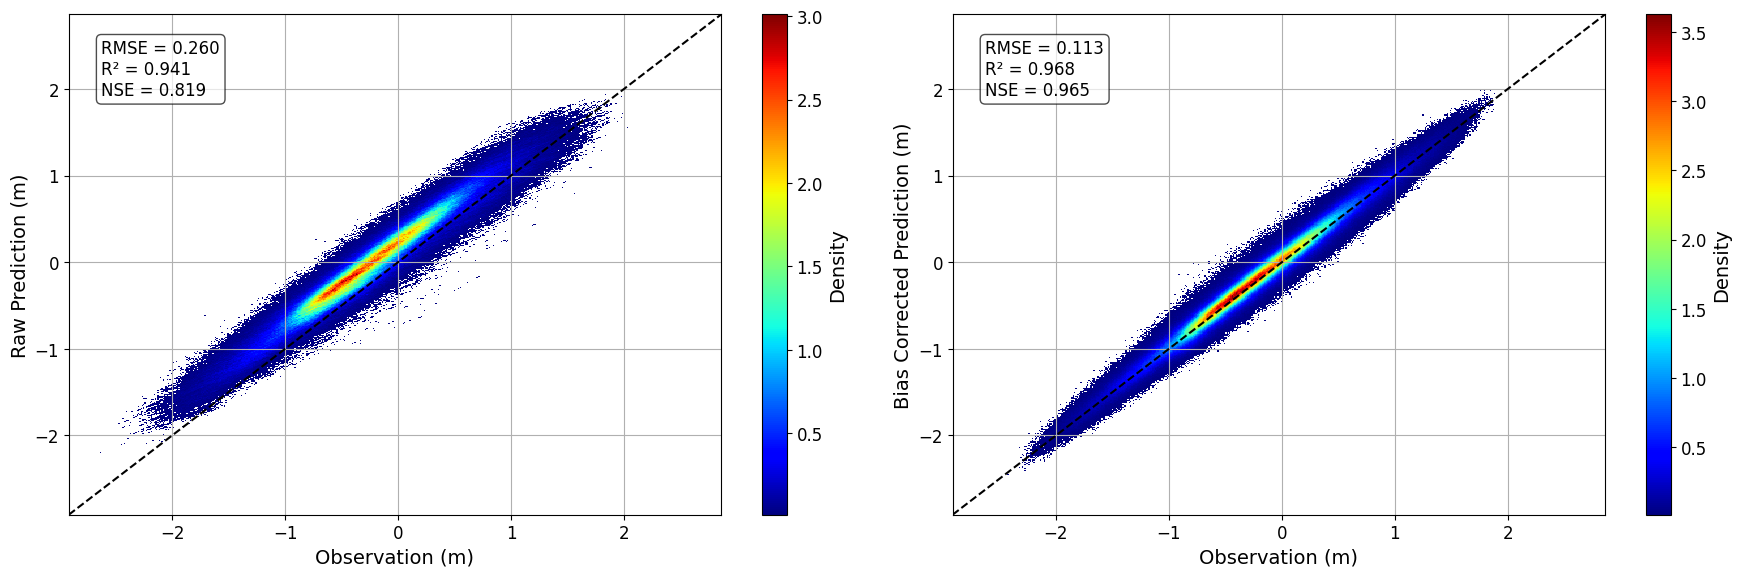

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_r

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_p

# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot_extreme.png', dpi=300)

# Show the plot
plt.show()


## scatter plots

In [58]:
# Dictionary to store metrics for each station
rmse_per_station_p_99 = {}
rmse_per_station_r_99 = {}
rmse_per_station_p_9 = {}
rmse_per_station_r_9 = {}
rmse_per_station_p_g = {}
rmse_per_station_r_g = {}

corr_per_station_p_99 = {}
corr_per_station_r_99 = {}
corr_per_station_p_9 = {}
corr_per_station_r_9 = {}
corr_per_station_p_g = {}
corr_per_station_r_g = {}


max_per_station_p_99 = {}
max_per_station_r_99 = {}
max_per_station_p_9 = {}
max_per_station_r_9 = {}
max_per_station_p_g = {}
max_per_station_r_g = {}



# Compute standard deviation for each station
for i, station in enumerate(station_ids):
    station_values_p = data_array_p_99[data_array_p_99[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_99[data_array_t_99[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_99[data_array_r_99[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_99[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_99[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_99[station] = np.corrcoef(station_values_t, station_values_r)[0, 1]
    corr_per_station_r_99[station] = np.corrcoef(station_values_t, station_values_p)[0, 1]
    max_per_station_p_99[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_99[station] = np.max(np.abs(station_values_r-station_values_t))

    station_values_p = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_9[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_9[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_9[station] = np.corrcoef(station_values_t, station_values_r)[0, 1]
    corr_per_station_r_9[station] = np.corrcoef(station_values_t, station_values_p)[0, 1]
    max_per_station_p_9[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_9[station] = np.max(np.abs(station_values_r-station_values_t))  

    Test_r2_station = Test_r2[:,i,:]
    Test_r_station = Test_r2_station[~np.isnan(Test_r2_station)]
    Test_p2_station = Test_p2[:,i,:]
    Test_p_station = Test_p2_station[~np.isnan(Test_p2_station)]
    Test_t2_station = Test_t2[:,i,:]
    Test_t_station = Test_t2_station[~np.isnan(Test_t2_station)]    
    rmse_per_station_r_g[station] = np.sqrt(np.mean((Test_r_station - Test_t_station)**2))
    rmse_per_station_p_g[station] = np.sqrt(np.mean((Test_p_station - Test_t_station)**2))
    corr_per_station_p_g[station] = np.corrcoef(Test_t_station, Test_p_station)[0, 1]
    corr_per_station_r_g[station] = np.corrcoef(Test_t_station, Test_r_station)[0, 1]
    max_per_station_p_g[station] = np.max(np.abs(Test_p_station-Test_t_station))
    max_per_station_r_g[station] = np.max(np.abs(Test_r_station-Test_t_station))



/tmp/ipykernel_3980866/3500499259.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_stations)  # Use tab20 or any other qualitative colormap


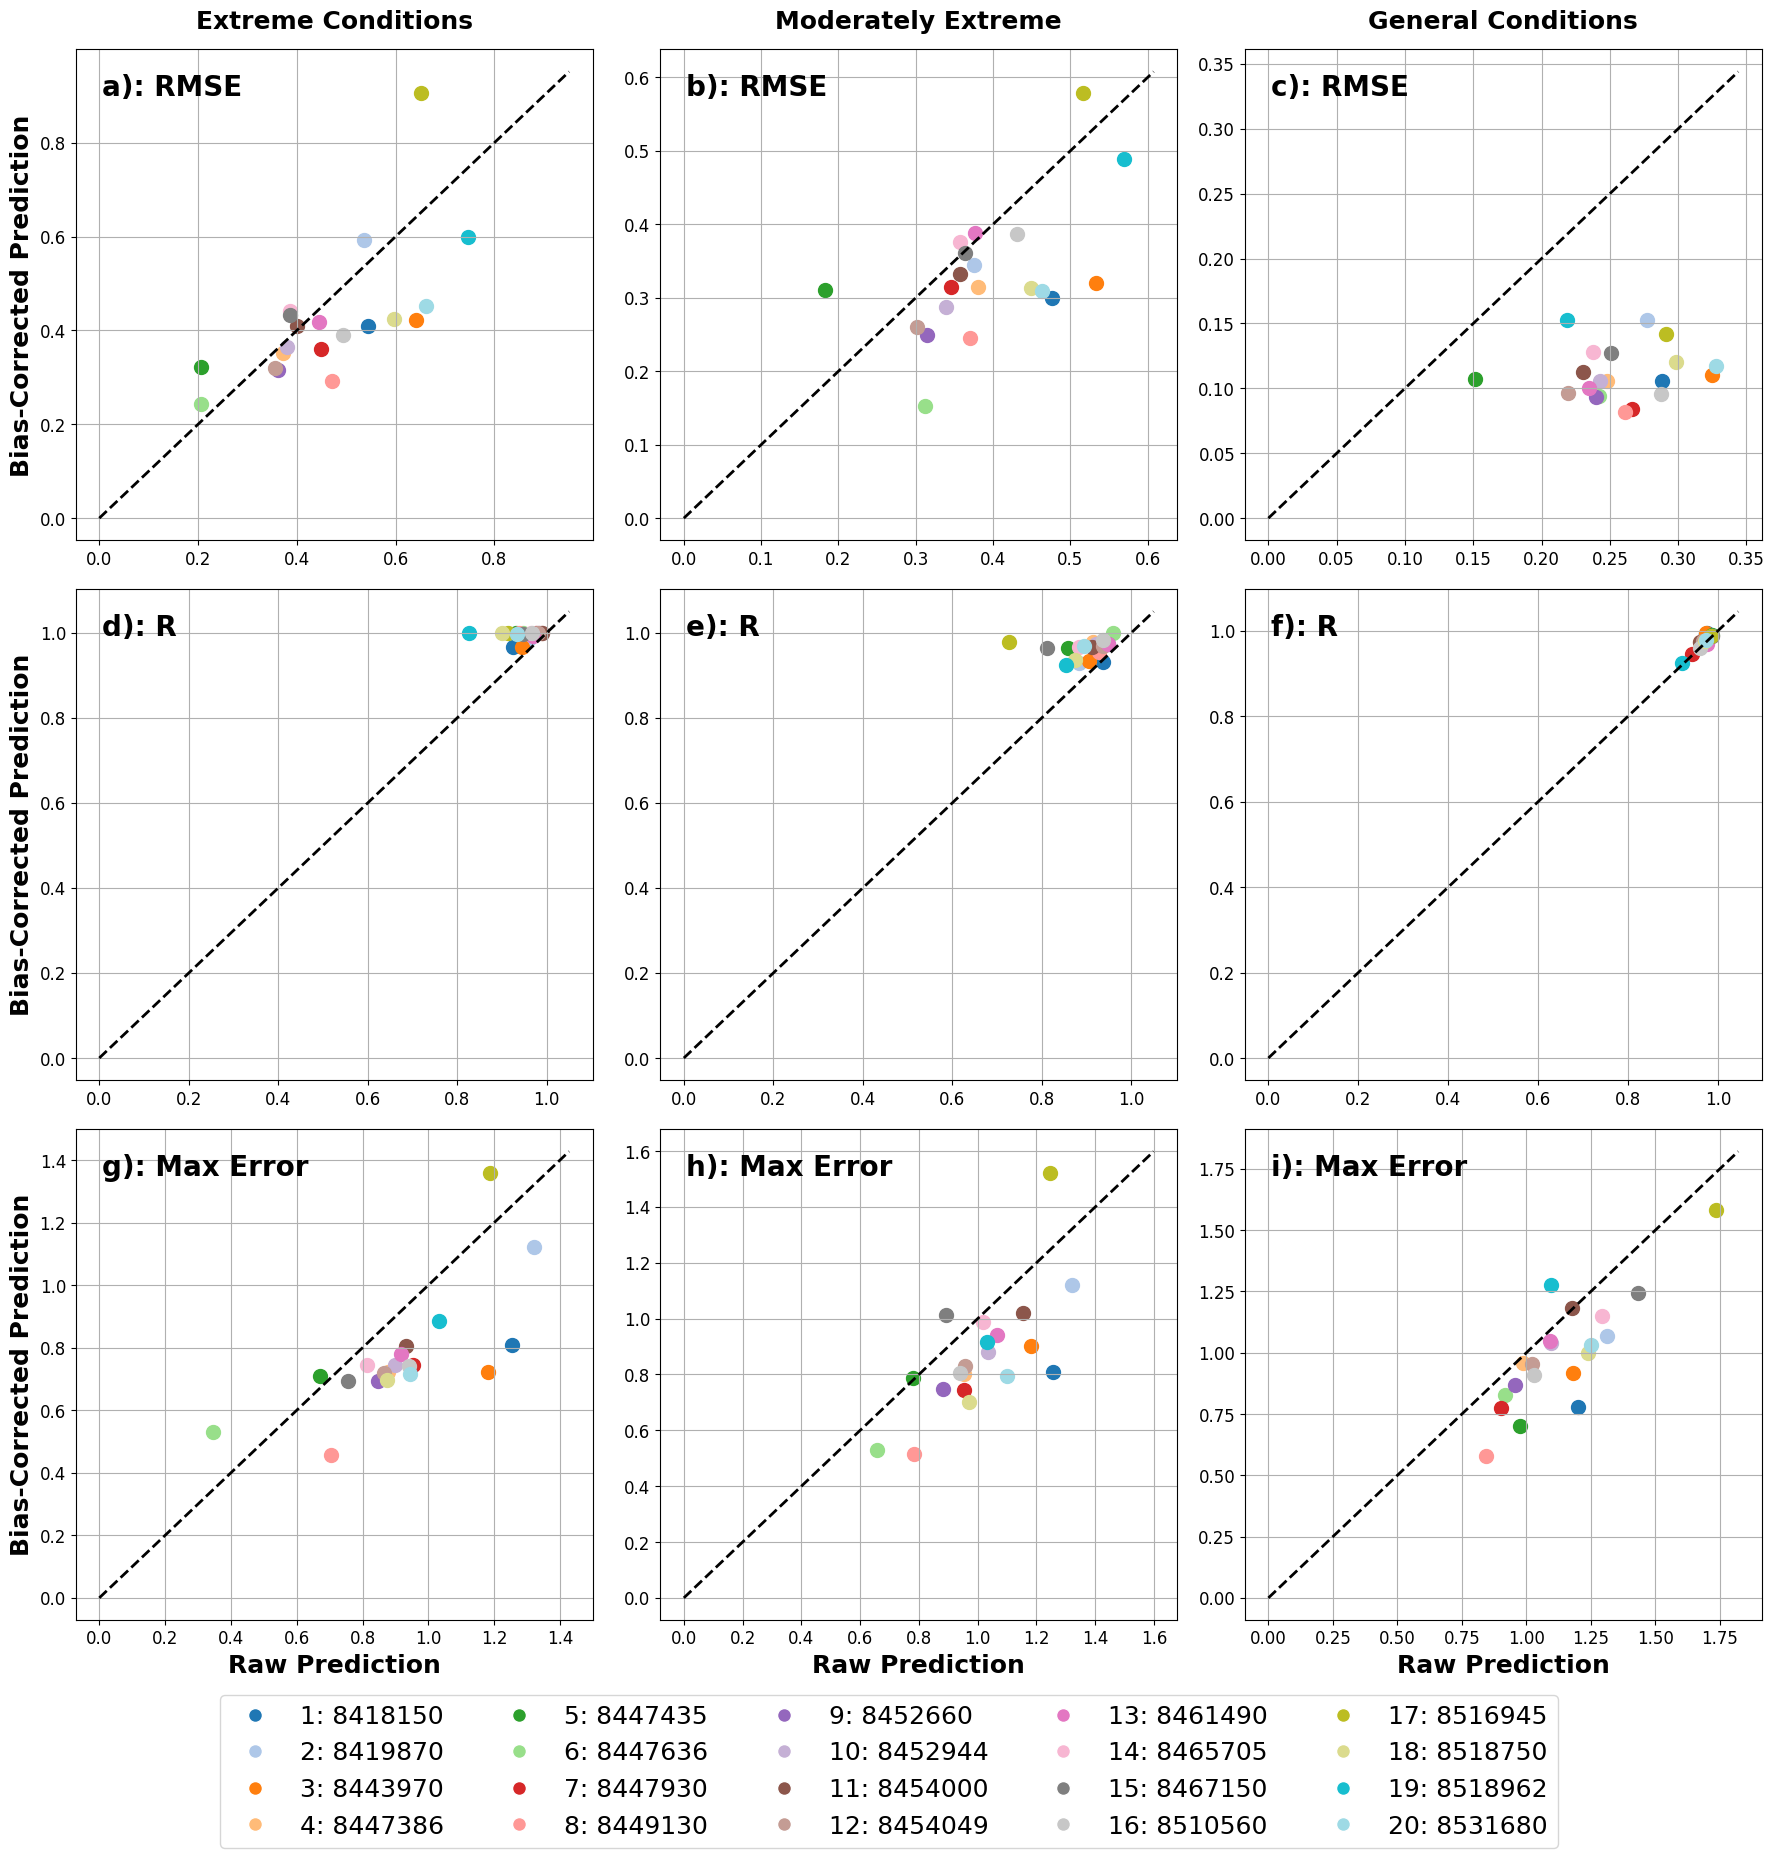

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
datasets = ['Extreme Conditions', 'Moderately Extreme', 'General Conditions']
metric_names = ['RMSE', 'R', 'Max Error']
letters = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']

# Group metrics
rmse_data = [
    (rmse_per_station_p_99, rmse_per_station_r_99),
    (rmse_per_station_p_9, rmse_per_station_r_9),
    (rmse_per_station_p_g, rmse_per_station_r_g)
]
corr_data = [
    (corr_per_station_p_99, corr_per_station_r_99),
    (corr_per_station_p_9, corr_per_station_r_9),
    (corr_per_station_p_g, corr_per_station_r_g)
]
max_data = [
    (max_per_station_p_99, max_per_station_r_99),
    (max_per_station_p_9, max_per_station_r_9),
    (max_per_station_p_g, max_per_station_r_g)
]

data_sets = [rmse_data, corr_data, max_data]

# Generate unique colors per station
num_stations = len(station_ids)
color_map = cm.get_cmap('tab20', num_stations)  # Use tab20 or any other qualitative colormap
station_colors = {station: color_map(i) for i, station in enumerate(station_ids)}

# Plot
for row_idx, data_type in enumerate(data_sets):  # RMSE, Corr, Max
    for col_idx, (p_dict, r_dict) in enumerate(data_type):  # 99p, 90p, Global
        ax = axes[row_idx, col_idx]
        
        for station in station_ids:
            p_val = p_dict[station]
            r_val = r_dict[station]
            ax.scatter(r_val, p_val, color=station_colors[station],  s=100, label=station)

        max_val = max(
            max(p_dict.values()),
            max(r_dict.values())
        ) * 1.05
        
        ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2)  # 1:1 line

        if row_idx == 0:
           ax.set_title(datasets[col_idx], fontsize=18,fontweight='bold')
        if  col_idx == 0:
            ax.set_ylabel('Bias-Corrected Prediction', fontsize=18,fontweight='bold')
        if  row_idx == 2:
            ax.set_xlabel('Raw Prediction', fontsize=18,fontweight='bold')

        ax.grid(True)
        ax.text(0.05, 0.95, f'{letters[row_idx * 3 + col_idx]}: {metric_names[row_idx]} ', transform=ax.transAxes,
                fontsize=20, fontweight='bold', va='top', ha='left')

# Create one legend outside the plot with all station names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=station_colors[station],
                       markersize=10, label=f'{i+1}: {int(station)}')
           for i, station in enumerate(station_ids)]

fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=18, bbox_to_anchor=(0.5, -0.04))

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust for legend space
plt.savefig("Figure_6_stations_colored.png", dpi=1200, bbox_inches='tight')
plt.show()
